In [1]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset, Symbol, sqrt
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python
## Квадратичные формы
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [2]:
from sympy.abc import x, y, z
u = 7 * x**2 + 10 * sympy.sqrt(3) * x * y - 3 * y**2 - 20 * z**2
A = Matrix([[7, 5 * sympy.sqrt(3), 0],
            [5 * sympy.sqrt(3), -3, 0],
            [0, 0, -20]])
X = Matrix([x, y, z])
res = simplify(expand(X.T * A * X))
display(Latex(f'X = {latex(X)}, X^T  A  X = {latex(*res)}, X^T  A  X - u = {latex(res[0] - u)}'))

<IPython.core.display.Latex object>

In [3]:
ev = A.eigenvects()  # собственные векторы матрицы $A$
P = Matrix([])
for item in ev:
    degree = item[1]
    display(Latex(f'собственное\ число\ {latex(item[0])},\ кратность\ {degree},\ собственный\ вектор: {latex(*item[2])}'))
    for i in range(degree):  # это на случай кратных собственных чисел
        P = P.row_join(item[2][i].normalized())  # нормируем собственные векторы матрицы $A$ 
display(Latex(f'P = {latex(P)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [4]:
A_new = P.T * A * P
display(simplify(A_new))

Matrix([
[-20,  0,  0],
[  0, -8,  0],
[  0,  0, 12]])

In [5]:
res = simplify(expand(X.T * A_new * X))[0]
display(res)

-20*x**2 - 8*y**2 + 12*z**2

In [6]:
print("Каноническая форма:")
collect(res, [x, y, z])  # порой в общем случае приходится использовать

Каноническая форма:


-20*x**2 - 8*y**2 + 12*z**2

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

In [7]:
A3 = Matrix([[97, -72, 241],
             [-72, 97, -266],
             [241, -266, -3452]])
X3 = Matrix([x, y, 1])
display(Latex(f'A3 = {latex(A3)}, X3 = {latex(X3)}'))

<IPython.core.display.Latex object>

In [8]:
# Убедимся в корректности записи условий:
eq3 = Eq(simplify(expand(X3.T * A3 * X3))[0], 0)
display(eq3)

Eq(97*x**2 - 144*x*y + 482*x + 97*y**2 - 532*y - 3452, 0)

In [9]:
# Теперь составим матрицу поворота...
alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2 * A3[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])
display(P)

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

In [10]:
# Вид матрицы после поворота (уже в новых координатах x1, y1):
A3 = simplify(expand((P.T * A3 * P)))
display(A3)

Matrix([
[           25,              0,  -25*sqrt(2)/2],
[            0,            169, -507*sqrt(2)/2],
[-25*sqrt(2)/2, -507*sqrt(2)/2,          -3452]])

In [11]:
# Запишем получившееся уравнение:
from sympy.abc import X, Y, Z
X3 = Matrix((X, Y, 1))
simplify(expand((X3.T * A3 * X3)[0]))

25*X**2 - 25*sqrt(2)*X + 169*Y**2 - 507*sqrt(2)*Y - 3452

Осталось перенести начало координат так, чтобы исчезли слагаемые с $X$ и $Y$. Соответствующая замена имеет вид:
$$
X=X'-\frac{a_1}{a_{11}},\quad Y=Y'-\frac{a_2}{a_{22}}
$$

In [12]:
X3_new = Matrix((X - A3[0, 2] / A3[0, 0], Y - A3[1, 2] / A3[1, 1], 1))
eq3_new = simplify(expand(X3_new.T * A3 * X3_new))[0]
display(Latex(f'X3\_new = {latex(X3_new)}, eq3\_new = {latex(eq3_new)}'))

<IPython.core.display.Latex object>

Осталось поделить выражение на 4225 и перенести свободный член в правую часть:

In [13]:
free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new / (-free) + 1
Eq(eq3_last, 1)

Eq(X**2/169 + Y**2/25, 1)

Заменим переменные $X$ и $Y$ на $x$, $y$, чтобы изобразить получившуюся гиперболу на одной координатной плоскости с графиком исходного уравнения.

In [14]:
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
display(eq3_last_xy)

Eq(x**2/169 + y**2/25, 1)

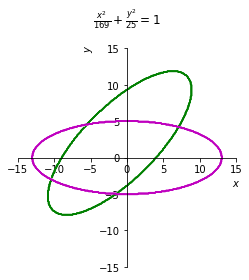

In [15]:
# Изобразим на графике исходную кривую и получившуюся гиперболу:

p = plot_implicit(eq3,(x, -15, 15), (y, -15, 15), line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$', 
                   title=f'${latex(eq3_last_xy)}$\n', adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy,(x, -15, 15), (y, -15, 15), line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

In [16]:
A3 = Matrix([[1, 1, -2], [1, 1, 2], [-2, 2, -4]]) # матрица из коэффицентов уравнения
X3 = Matrix([x, y, 1])
display(Latex(f'A3 = {latex(A3)}, X3 = {latex(X3)}'))

<IPython.core.display.Latex object>

In [17]:
alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2 * A3[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])
display(P) # матрица поворота
A3 = simplify(expand((P.T * A3 * P)))
display(A3) # исходная матрица после поворота

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

Matrix([
[2,         0,         0],
[0,         0, 2*sqrt(2)],
[0, 2*sqrt(2),        -4]])

In [18]:
from sympy.abc import X, Y, Z
X3 = Matrix((X, Y, 1))
display(simplify(expand((X3.T * A3 * X3)[0]))) # новое уравнение
X3_new = Matrix((X - A3[0, 2] / A3[0, 0], Y, 1)) # переносим начало координат, делаем замену
eq3_new = simplify(expand(X3_new.T * A3 * X3_new))[0]
display(Latex(f'X3\_new = {latex(X3_new)}, eq3\_new = {latex(eq3_new)}'))

2*X**2 + 4*sqrt(2)*Y - 4

<IPython.core.display.Latex object>

In [19]:
free = eq3_new.subs({X: 0, Y: 0}) # делим на свободный член и переносим его в другую сторону
eq3_last = eq3_new / (-free) + 1
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1) # меняем на маленькие буквы
eq3_last_xy = Eq(y, solve(eq3_last_xy, y)[0])
display(eq3_last_xy)

Eq(y, sqrt(2)*(2 - x**2)/4)

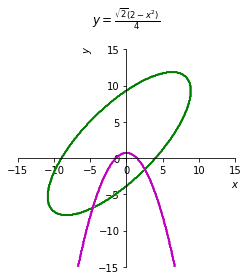

In [20]:
p = plot_implicit(eq3,(x, -15, 15), (y, -15, 15), line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$', 
                   title=f'${latex(eq3_last_xy)}$\n', adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy,(x, -15, 15), (y, -15, 15), line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

$$Q = 6436 x^{2} - 220 \sqrt{6} x y + 1756 \sqrt{6} x z + 2225 y^{2} + 2640 y z - 3661 z^{2}$$

In [21]:
u = 6436 * x ** 2 - 220 * sqrt(6) * x * y + 1756 * sqrt(6) * x * z + 2225 * y ** 2 + 2640 * y * z - 3661 * z ** 2 # квадратичная форма
A = Matrix([[1159, 16 * sqrt(21), 41 * sqrt(3)], [16 * sqrt(21), 764, - 48 * sqrt(7)], [41 * sqrt(3), - 48 * sqrt(7), 1077]]) # матрица квадратичной формы
X = Matrix([x, y, z])
res = simplify(expand(X.T * A * X))
display(Latex(f'X = {latex(X)}, X^T  A  X = {latex(*res)}, X^T  A  X - u = {latex(res[0] - u)}')) # проверка

<IPython.core.display.Latex object>

In [22]:
ev = A.eigenvects()  # собственные векторы матрицы $A$
P = Matrix([])
for item in ev:
    degree = item[1]
    display(Latex(f'собственное\ число\ {latex(item[0])},\ кратность\ {degree},\ собственный\ вектор: {latex(*item[2])}'))
    for i in range(degree):  # это на случай кратных собственных чисел
        P = P.row_join(item[2][i].normalized())  # нормируем собственные векторы матрицы $A$ 
display(Latex(f'P = {latex(P)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [23]:
A_new = P.T * A * P 
display(simplify(A_new))
display(simplify(expand(X.T * A_new * X))[0]) # переход к новому базису

Matrix([
[700,    0,    0],
[  0, 1100,    0],
[  0,    0, 1200]])

700*x**2 + 1100*y**2 + 1200*z**2

Хорасанджян Левон, вариант №157